# Atwood's machine | Constraints

[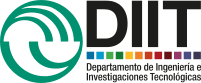](https://ingenieria.unlam.edu.ar/)  
2025 [Víctor A. Bettachini](mailto:vbettachini@unlam.edu.ar)  
[by-nc-sa_80x15.png](https://creativecommons.org/licenses/by-sa/4.0/)

---

## Atwood machine

The figure shows a string of length $\ell$ and a pulley of radius $R_p$ and mass $m_p$.
Find the acceleration of the masses attached at each end of the string.
1. The string is inextensible, so it establishes a relation between $y_1$ and $y_2$. Write the function for this constraint.
1. If the string slides over the pulley without friction, the pulley will not move. Write the Euler-Lagrange equation for $y_1$ using the constraint from the previous item and write the masses' acceleration.
1. Usually, the string won't slide and the pulley will rotate. This constraint adds a relation between $\theta$ and the displacement of the string. Using that constraint, write the pulley's rotational kinetic energy in terms of $\dot{y}_1$, modeling the pulley as an homogeneous cylinder with a moment of inertia of $(m/2) R^2$.
1. Use the Euler-Lagrange equation for $y_1$ to write the masses' accelerations.

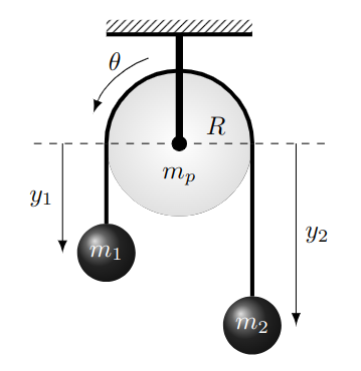

In [2]:
import sympy as sm # import functions for symbolic manipulations
from sympy.physics import mechanics as me
me.init_vprinting() # dot notation for velocity and acceleration

In [3]:
# Parameters for the system
pulley_m, pulley_R, m1, m2, g, l = sm.symbols('m_{pulley}, R_{pulley}, m_1, m_2, g, \ell', positive=True)

## a) Constraint
Each time we see a relation between generalized coordinates or velocities a **constraint** is established between them.

#### String's length

Considering an inextensible string, that is, that its length $\ell$ remains constant, a constraint is established between the coordinates of both weights hanging from the pulley.

The string spans over half the circumference of the pulley of radius $R$, with an arc length of $\pi R$, the total string's length $\ell$ is the sum of this arc and the vertical distances to the masses on each side:
$$
y_1+ y_2 + \pi R = \ell\,.
$$
These relations are expressed as homogeneous equations (set equal to zero):
$$
y_1+ y_2 + \pi R - \ell = 0\,.
$$

In [32]:
y1, y2 = me.dynamicsymbols('y_1, y_2')
constraint_lengthString = sm.Eq(y1+ y2 + sm.pi* pulley_R - l, 0 ) # constraint l as an homogeneous equation
constraint_lengthString

## b) Euler-Lagrange for $y_1$

### Positions

The usual procedure is to define the positions of each body in a frame of reference using the generalized coordinates.

If we place the origin of our frame of reference at the center of the pulley, with versor $\hat{x}$ directed toward the right and $\hat{y}$ directed upward, the positions are:

In [5]:
# Frame of reference
e = me.ReferenceFrame('e')

In [6]:
body1_r = (-pulley_R * e.x) + (-y1 * e.y) # position of mass 1
body2_r = (pulley_R * e.x) + (-y2 * e.y) # position of mass 2
body1_r, body2_r

The components along $\mathbf{\hat{e}_x}$ are unnecesary for this problema, but we found them anyway for future reference.

### Reducing the number of generalized coordinates

The constraint equation is used to rewrite some of the coordinates or velocities in terms of others, thus reducing the number of degrees of freedom.

In this case, only the center of mass of each hanging mass are displaced, and the position vector of both can be expressed using only one generalized coordinate.

Solving for this coordinate in the constraint equation can be done using the method `solveset`, which solves algebraic equations in one variable.
There are alternatives when there is more than one variable, `linsolve` for systems of linear equations and `nonlinsolve` for nonlinear.

In [7]:
y2_lengthString =  sm.Eq(
  y2,
  sm.solveset(constraint_lengthString, y2).args[0] # args[0] selects the first solution, the only one in this case.
)
y2_lengthString

The methods of `SymPy` for isolating symbolic variables can return a set of solutions compatible with the initial equation, which requires selecting one of the solutions.

In [8]:
body2_r = body2_r.subs(y2, y2_lengthString.rhs)
body1_r, body2_r

### Translational kinetic energy

In [9]:
def energyKineticTranslation(mass, position, frameOfReference):
    """
    Given a mass and the position of a point particle in a frame of reference, it returns its kinetic energy.
    
    Parameters
    ----------
    mass: (sympy.core.symbol.Symbol)
        of one particle
    position: (sympy.physics.vector.vector.Vector)
        of the particle's center of mass
    frameOfReference: (sympy.physics.vector.frame.ReferenceFrame)
        in which the position is expressed
    
    Returns
    -------
    Sympy Equality (sympy.core.relational.Equality)
        The kinetic energy of the system is made explicit on the right-hand side, as a function of the generalized coordinates and velocities, and time.
        Kinetic Energy, T = (m/2) \dot{\vec{r}} \cdot\dot{\vec{r}}
    """
    velocity = position.dt(frameOfReference)
    oneHalf = sm.Rational(1,2) # Rational: a quotient of integers
    T_translational = sm.Eq(
        sm.Symbol('T_\mathrm{translational}'),
        oneHalf* mass* velocity.dot(velocity)
        ).simplify()
    return T_translational

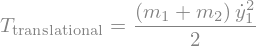

In [10]:
# System's kinetic energy
body1_T = energyKineticTranslation(m1, body1_r, e)
body2_T = energyKineticTranslation(m2, body2_r, e)
T_translational = sm.Eq(
  body1_T.lhs,
  body1_T.rhs + body2_T.rhs
  ).simplify()
T_translational

### Gravitational potential energy

In [11]:
def energyPotentialGravitational(mass, position, accelerationGravity):
    """
    Provides the gravitational potential energy of a particle of mass m and position r in a given frame of reference in which g is the acceleration due to gravity.
    
    Parameters
    ----------
    accelerationGravity: (sympy.physics.vector.vector.Vector)
        vector oriented according to the frame of reference
    mass: (sympy.core.symbol.Symbol
        of the body
    position: (sympy.core.symbol.Symbol)
        of the center of mass in a frame of reference related to the one for the acceleration due to gravity

    Returns
    -------
    Sympy Equality (sympy.core.relational.Equality)
        The potential energy of the system is made explicit on the right-hand side, as a function of the generalized coordinates and velocities, and time.
    coordinateGeneralized: Sympy Symbol (sympy.core.symbol.Symbol)
        V = - (m \vec{accelerationGravity}) \cdot{position}
    """
    V_gravitational = sm.Eq(
        sm.Symbol('V_\mathrm{gravitational}'),
        - (mass* accelerationGravity).dot(position)
        ).simplify()
    return V_gravitational

In [12]:
# Potential energy
g_vector = g* (-e.y) # acceleration due to gravity on -y versor
body1_V = energyPotentialGravitational(m1, body1_r, g_vector)
body2_V = energyPotentialGravitational(m2, body2_r, g_vector)
V = sm.Eq(
  body1_V.lhs,
  body1_V.rhs + body2_V.rhs ).simplify()
V

### System's Lagrangian

Recall that there is a unique Lagrangian per system.
$$
\mathcal{L}(q_i, \dot{q}_i, t) = T(q_i, \dot{q}_i, t)- V(q_i, \dot{q}_i, t).
$$

If the pulley were not considered, the generalized coordinate that describes its orientation $\theta$, and the corresponding generalized velocity $\dot{\theta}$, will be missing from the Lagrangian.
$$
\mathcal{L}(y_1, \dot{y}_1) = T(\dot{y}_1)- V(y_1).
$$

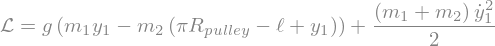

In [13]:
sm.Eq(sm.Symbol('\mathcal{L}'), (T_translational.rhs - V.rhs).simplify() )

Remember that the function `euler_lagrange`, that we wrote previously, calculates the Lagrangian internally, so it's not necessary to calculate it manually.
The objective of this section is to recall that this function is unique for the system, and the Euler-Lagrange equations for each generalized coordinate will be derived from it.
There is only one generalized coordinate in this case, thus there will be only one Euler-Lagrange equation.

### Single degree of freedom, one Euler-Lagrange equation

Even though in this case we calculate a single Euler-Lagrange equation, in general, there are as many equations as generalized coordinates $q$ in the system.

In [14]:
def eulerLagrange(T, V, coordinateGeneralized):
    '''    
    Provides the Euler-Lagrange equation for one generalized coordinate starting from the energies.
    
    Parameters
    ----------
    T : Sympy Equality (sympy.core.relational.Equality)
        The kinetic energy of the system is explicit on the right-hand side, as a function of the generalized coordinates and velocities, and time.
    V : Igualdad Sympy (sympy.core.relational.Equality)
        The potential energy of the system is explicit on the right-hand side, as a function of the generalized coordinates and velocities, and time.
    coordinateGeneralized: Sympy Symbol (sympy.core.symbol.Symbol)
        for which we are looking the Euler-Lagrange equation
        
    Returns
    -------
    Sympy Equality (sympy.core.relational.Equality)
        Homogeneous Euler-Lagrange equation
    '''
    lagrangian = (T.rhs - V.rhs).expand()
    t = sm.Symbol('t') # since we have to differentiate respect to time, the function diff declares t as a symbol
    return sm.Eq(
        lagrangian.diff(coordinateGeneralized) 
        - lagrangian.diff(coordinateGeneralized.diff(t)).diff(t)
        , 0
    ).simplify()

In [15]:
y1_EL = eulerLagrange(T_translational, V, y1)
y1_EL

### Solving for the acceleration
From the Euler-Lagrange equation we can find expressions for $\ddot{q}$ and assign this result to a variable for future use.
This is done using the functions `solveset`, `linsolve` or `nonlinsolve`, depending on the case.

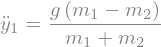

In [17]:
t = sm.Symbol('t')
variable = y1.diff(t, 2)
y1_pp = sm.Eq(
  variable,
  sm.solveset(y1_EL, variable).args[0]
  )# args[0] selects the first element
y1_pp

We can use this result to find $\ddot{y}_2$ using the solution we found for $y_2$ from the constraint equation.

In [18]:
y2_pp = sm.Eq(
  y2_lengthString.lhs.diff(t,2),
  y2_lengthString.rhs.diff(t,2)
  )
y2_pp

Thus ...

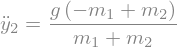

In [19]:
y2_pp = y2_pp.subs(y1_pp.lhs, y1_pp.rhs).simplify()
y2_pp

## c) The string does not slide over the pulley

Usually, there is another constraint involving the string.
If it does not slide over the pulley, then the pulley will change its orientation.
We can describe this using an angle, $\theta$.

The angle for the pulley is a function of $y_1$ or alternatively of $y_2$.
Note that a change of sign is required if we decide to use one or the other, to keep a positive angle when it's counter-clockwise.
Chosing the first option we get

In [ ]:
theta = me.dynamicsymbols(r'\theta')
constraintNoSlide = sm.Eq(y1 - pulley_R* theta, 0)
constraintNoSlide

### Rotational kinetic energy

The pulley's center of mass is not moving, but its rotation adds a term to the kinetic energy, in terms of the angular velocity $\vec{\omega}$.

Later in the course we will cover the **inertia tensor** $\overline{\overline{I}}$ of a rigid body de un cuerpo extenso, and will find that the rotational kinetic energy can be calculated as
$$
T_\mathrm{rotational} = \frac{1}{2} \overline{\overline{I}} \vec{\omega} \vec{\omega}\,,
$$
where $\omega$ is the **angular velocity**. 
This expressions reduces to
$$
T_\mathrm{rotational} = \frac{1}{2} I \vec{\omega}^2\, ,
$$
when $\vec{\omega}$ is aligned with one of the axes of symmetry of the rigid body, and knowing just one of the elements of this tensor is enough.

#### Pulley's angular velocity

An infinitesimal change in the arc the string makes over the pulley, caused by an infinitesimal displacement of the hanging bodies, e.g. $d y_1$, implies an infinitesimal change $d \theta$ as
$$
\frac{d y_1}{R} = d \theta\,.
$$

This infinitesimal changes take part during infinitesimal intervals of time $d t$. which lets us to relate the corresponding generalized velocities.

In [23]:
constraintNoSlide.lhs.diff(t)

Then we have a constraint that allows us to omit $\dot{\theta}$ as a variable and express it in terms of $\dot{y}$.

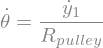

In [24]:
variable = theta.diff(t)
theta_p_noSlide = sm.Eq(
  variable,
  sm.solve(constraintNoSlide.lhs.diff(t), variable)[0]
  )
theta_p_noSlide

#### Pulley's moment of inertia

The moment of inertia of a cylinder of mass $m_{p}$ and radius $R$ rotating around its longitudinal axis of symmetry is
$$
I_\mathrm{pulley} = \frac{1}{2} m_{p} R^2.
$$

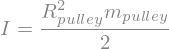

In [25]:
oneHalf = sm.Rational(1,2)
pulley_I = sm.Eq(
    sm.Symbol('I'),
    oneHalf * pulley_m* pulley_R**2
)
pulley_I

In [26]:
def energyKineticRotational(momentOfInertia, angularVelocity):
    """
    Calculates the kinetic energy of a body rotating around an axis.

    Parameters
    ----------
    momentOfInertia : Sympy Multiplication (sympy.core.mul.Mul)
        Expressed using the axis as reference.
    angularVelocity : Sympy Multiplication (sympy.core.mul.Mul)
        Angular velocity around an axis.

    Returns
    -------
    Sympy Equality (sympy.Equality)
        Rotational kinetic energy (I/2)* omega**2
    """
    oneHalf = sm.Rational(1,2)
    T_rotational = sm.Eq(
        sm.Symbol('T_{rotational}'),
        oneHalf* momentOfInertia * angularVelocity**2
     ).simplify()
    return T_rotational

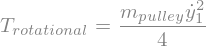

In [27]:
T_rotationalPulley = energyKineticRotational(pulley_I.rhs, theta_p_noSlide.rhs)
T_rotationalPulley

## d) Accelerations including the pulley

Including this new term, the system's kinetic energy is

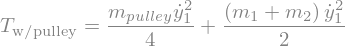

In [28]:
T_withPulley = sm.Eq(
    sm.Symbol('T_\mathrm{w/pulley}'),
    T_translational.rhs + T_rotationalPulley.rhs
)
T_withPulley

And the Euler-Lagrange equation is

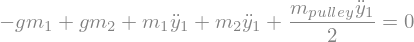

In [29]:
y1_EL_withPulley = eulerLagrange(T_withPulley, V, y1)
y1_EL_withPulley 

And the acceleration will be smaller

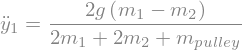

In [30]:
y1_pp_withPulley = sm.Eq(
  y1.diff(t,2),
  sm.solve(y1_EL_withPulley, y1.diff(t,2) )[0]
  )
y1_pp_withPulley

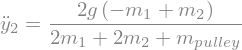

In [31]:
y2_pp = sm.Eq(
  y2_lengthString.lhs.diff(t,2),
  y2_lengthString.rhs.diff(t,2).subs(y1_pp_withPulley.lhs, y1_pp_withPulley.rhs)
  ).simplify()
y2_pp